NAMA : IBNU GILANG PRADUTA CIPTA

KELAS : INFORMATIKA A 22

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
ibnu = pd.read_csv("bank-full.csv")

In [4]:
ibnu.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
ibnu.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [16]:
ibnu.loc[:, 'day'] = ibnu.loc[:, 'day'].replace(1, 2)
ibnu.loc[:, 'day'] = ibnu.loc[:, 'day'].replace(3, np.NAN)
ibnu.loc[:, 'day'] = ibnu.loc[:, 'day'].replace(4, 0)

ibnu.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198,1,-1,0,unknown,no


In [17]:
var = ibnu.columns[(ibnu.nunique() == 3) | (ibnu.nunique() == 4)].tolist()
ibnu.loc[:, var] = ibnu.loc[:, var].replace([1,2,3], np.NAN)
ibnu.loc[:, var] = ibnu.loc[:, var].replace(4, 0)

ibnu.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198,1,-1,0,unknown,no


In [18]:
ibnu['durasi'] = np.where(ibnu['duration'] == '9999-99-99', 0, 1)
ibnu.drop(columns='duration', inplace=True)

ibnu.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,durasi
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,1,-1,0,unknown,no,1


In [19]:
ibnu.drop(columns=['contact','poutcome'], inplace=True)

In [20]:
ibnu.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y,durasi
0,58,management,married,tertiary,no,2143,yes,no,5.0,may,1,-1,0,no,1
1,44,technician,single,secondary,no,29,yes,no,5.0,may,1,-1,0,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,5.0,may,1,-1,0,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,5.0,may,1,-1,0,no,1
4,33,unknown,single,unknown,no,1,no,no,5.0,may,1,-1,0,no,1


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ["balance", "education"]
ibnu_categorical = encoder.fit_transform(ibnu[categorical_cols])
categorical_names = encoder.get_feature_names_out(categorical_cols)
ibnu_categorical = pd.DataFrame(ibnu_categorical, columns=categorical_names)

ibnu_categorical.head()

,balance_-8019,balance_-6847,balance_-4057,balance_-3372,balance_-3313,balance_-3058,balance_-2827,balance_-2712,balance_-2604,balance_-2282,...,balance_66653,balance_66721,balance_71188,balance_81204,balance_98417,balance_102127,education_primary,education_secondary,education_tertiary,education_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
ibnu = pd.concat([ibnu, ibnu_categorical], axis=1)
ibnu.head()

,age,job,marital,education,default,balance,housing,loan,day,month,...,balance_66653,balance_66721,balance_71188,balance_81204,balance_98417,balance_102127,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,5.0,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,44,technician,single,secondary,no,29,yes,no,5.0,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5.0,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,5.0,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,unknown,single,unknown,no,1,no,no,5.0,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
print("NIlai Duplikat: ")
ibnu.duplicated().sum()

NIlai Duplikat: 


23

In [25]:
ibnu.drop_duplicates(inplace=True)

In [26]:
print("NIlai Duplikat: ")
ibnu.duplicated().sum()

NIlai Duplikat: 


0

In [27]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
ibnu.age = scaler.fit_transform(ibnu.age.values.reshape(-1,1))

In [29]:
X = ibnu[['balance_66653','balance_66721']] 
y = ibnu['education_primary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = Sequential()

In [33]:
model.add(layers.Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', 
              loss = 'mse',
             metrics = ['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
2260/2260 [==============================] - 19s 7ms/step - loss: 0.1313 - accuracy: 0.8489 - val_loss: 0.1304 - val_accuracy: 0.8460
Epoch 2/5
2260/2260 [==============================] - 18s 8ms/step - loss: 0.1282 - accuracy: 0.8491 - val_loss: 0.1303 - val_accuracy: 0.8460
Epoch 3/5
2260/2260 [==============================] - 20s 9ms/step - loss: 0.1283 - accuracy: 0.8491 - val_loss: 0.1303 - val_accuracy: 0.8460
Epoch 4/5
2260/2260 [==============================] - 18s 8ms/step - loss: 0.1282 - accuracy: 0.8491 - val_loss: 0.1304 - val_accuracy: 0.8460
Epoch 5/5
2260/2260 [==============================] - 20s 9ms/step - loss: 0.1282 - accuracy: 0.8491 - val_loss: 0.1303 - val_accuracy: 0.8460


In [36]:
if isinstance(y_test.iloc[0], (int, float)):  
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("R-squared Score:", r2)
else:  
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int) 
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

283/283 [==============================] - 2s 5ms/step
R-squared Score: -1.139832188745693e-05


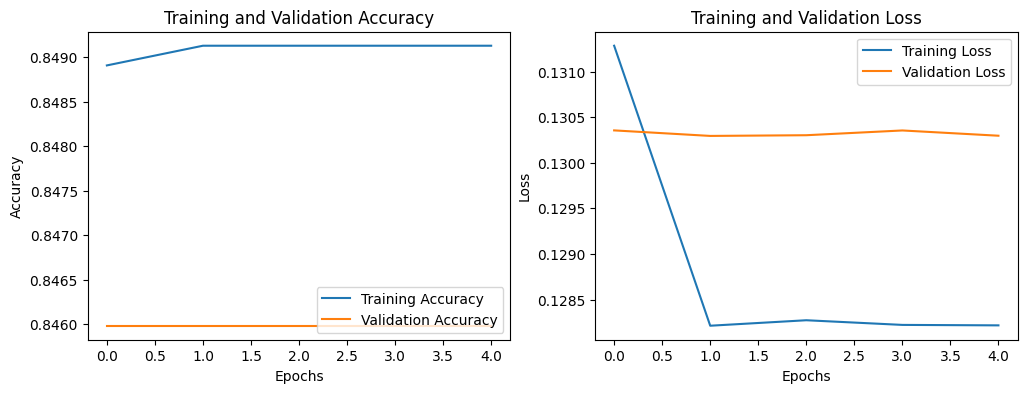

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()